# Profit Maximization with Thompson Sampling


# Instroduction
A company wants to implement a plan premium for its clients. The goal for this online reatail business is getting as many suscribers as possible to the special plan. This is offered for 100$ per year.

The marketing department has provided us 10 differents strategies and our IA will not have any idea which one is the best. So we will assume that each has a fixed conversion rate. These 10 strategies are all different,  they have different shapes, different packages, different advertisements, and different special offers to convince and persuade customers to subscribe to the premium plan. The marketing team wants to figure it out as soon as possible.

To simulate this Case Study, we will assume these strategies have the following conversion rates:

Strategy|  Conversion Rate
  
  1     |        0.01
  
  2     |       0.08
  
  3     |      0.1
  
  4     |      0.04
  
  5     |      0.26
  
  6     |      0.12
  
  7     |      0.17
  
  8     |      0.09
  
  9     |      0.19
  
 10     |      0.25
 
 
 We will simulate 10,000 clients being approached successively by one of the 10 strategies, and with the rewards matrix we will simulate the client's decision to subscribe *yes*(1) or *no*(0) to the premium plan. As an example, the first few rows of a simulated reward matrix:
 
 blablablabla
 
 
Thompson sampling will collect the feedback from each of these subscribers and thanks to its powerful algorithm, it will quickly figure out the strategy with the highest conversion rate.
 

### Thompson sampling steps: 

* [https://en.wikipedia.org/wiki/Thompson_sampling](https://en.wikipedia.org/wiki/Thompson_sampling)

* [https://towardsdatascience.com/thompson-sampling-fc28817eacb8](https://towardsdatascience.com/thompson-sampling-fc28817eacb8)

We repeat for more than 10000 iteratios for each round *C*.

**Step 1:** A random value is chosen for each iteration *i*. This value has to follow the distribution:
$$
\theta_i(n) \sim \beta(N_i^1(n)+1,N_i^0(n)+1)
$$

,where:

* $N_i^1(n)$ is the number of times the i-th strategy has gotten a reward equal to 1 until the n-th round.
* $N_i^0(n)$ is the number of times the i-th strategy has gotten a reward equal to 0 until the n-th round.

**Step 2:** We select the strategy $s(n)$ that gives us the highest value $\theta_i(n)$:
$$
s(n) = \underset{i\in\{1,...,9\}}{\textrm{argmax}}(\theta_i(n))
$$

**Step 3:** We update $N_{s(n)}^1(n)$ and $N_{s(n)}^0(n)$ according to the next conditions:

* If the selected strategy $s(n)$ has a reward equal to 1: $N_{s(n)}^1(n) := N_{s(n)}^1(n) + 1$.

* If the selected strategy $s(n)$ has a reward equal to 0: $N_{s(n)}^0(n) := N_{s(n)}^0(n) + 1$.


Each strategy has its own beta distribution. Throughout the rounds, the beta distribution strategy with the highest conversion rate will progressively move to the right, and the beta distributions strategy with the lowest conversion rates will progressively move to the left *(Steps 1 and 3)*. Therefore, due to *Step 2*, the strategy with the highest conversion rate will be selected.

*[Source: [https://medium.com/pursuitnotes/day-28-reinforcement-learning-3-7a98bacc0927](https://medium.com/pursuitnotes/day-28-reinforcement-learning-3-7a98bacc0927)]*

We will also implement the *random selection algorithm*, which will select a random strategy each round. This will be our benchmark for evaluating the return of our Thompson sampling model. Of course, the Thompson sampling and the random selection algorithm will compete in the same simulation using the same reward matrix. Once the complete simulation is done, we will evaluate the Thompson Sampling return by calculating the relative return:
$$
\textrm{Relative return} = \frac{\textrm{(Return of Thompson)} - (\textrm{Return of random selection})}{\textrm{Random Selection Reward}} \cdot 100
$$

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Config Parameters

In [2]:
C = 100000 #Number of rounds = Number of clients
s = 10 #Number of marketing strategies

## Building the simulation

In [3]:
conversion_rates = [0.01, 0.08, 0.1, 0.04, 0.26, 0.12, 0.17, 0.09, 0.19, 0.25]
X = np.array(np.zeros([C, s]))
for i in range(C): #Rounds=clients
    for j in range(s): #Strategy
        if np.random.rand() <= conversion_rates[j]: #if our random number.....then...
            X[i,j] = 1

## Random assignment and Thompson sampling

In [4]:
strategies_selected_rs = [] #random select
strategies_selected_ts = [] #thompson select
total_reward_rs = 0
total_reward_ts = 0
number_of_rewards_1 = [0] * s #creating a s-zeros list
number_of_rewards_0 = [0] * s
for n in range(0, C): #Starting rounds=clients
    # Random Selection
    strategy_rs = random.randrange(s) #select a random strategy
    strategies_selected_rs.append(strategy_rs)
    reward_rs = X[n, strategy_rs] #WE get the reward which has been created before
    total_reward_rs += reward_rs
    # Thompson Sampling
    strategy_ts = 0
    max_random = 0
    for i in range(0, s):
        #Step 1
        random_beta = random.betavariate(number_of_rewards_1[i]+1, 
                                         number_of_rewards_0[i]+1)
        #Step 2
        if random_beta > max_random: 
            max_random = random_beta
            strategy_ts = i
    strategies_selected_ts.append(strategy_ts)
    #Step 3
    reward_ts = X[n, strategy_ts]
    if reward_ts == 1:
        number_of_rewards_1[strategy_ts] += 1
    else:
        number_of_rewards_0[strategy_ts] += 1
    total_reward_ts += reward_ts

## Relative and absolute return

In [5]:
absolute_return = (total_reward_ts - total_reward_rs)*100 #We assume 100 $/sale.
relative_return = (total_reward_ts - total_reward_rs) / total_reward_rs * 100
print("Absolute Return: {:.0f} $".format(absolute_return))
print("Relative Return: {:.0f} %".format(relative_return))

Absolute Return: 1287500 $
Relative Return: 98 %


# Plotting histogram

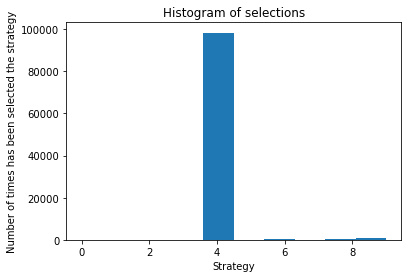

In [6]:
plt.hist(strategies_selected_ts)
plt.title("Histogram of selections")
plt.xlabel("Strategy")
plt.ylabel("Number of times has been selected the strategy")
plt.show()


In [7]:

![png](Recursos/dsitribution.png)


/bin/bash: -c: line 0: syntax error near unexpected token `Recursos/dsitribution.png'
/bin/bash: -c: line 0: `[png](Recursos/dsitribution.png)'


# Regret Curve

The Regret curve is the representation of the difference between the best strategy and the model, with respect to the rounds. The best strategy is calculated obtaining the maximum accumulated rewards in all the different strategies in each round.

In [8]:
rewards_strategies = [0] * s
for n in range(0, C):
    # Best Strategy
    for i in range(0, s):
        rewards_strategies[i] = rewards_strategies[i] + X[n, i]
    total_reward_bs = max(rewards_strategies)

**- Regret of Thompson Sampling:**

In [9]:
strategies_selected_ts = []
total_reward_ts = 0
total_reward_bs = 0
numbers_of_rewards_1 = [0] * s
numbers_of_rewards_0 = [0] * s
rewards_strategies = [0] * s
regret = []

for n in range(0, C):
    # Thompson Sampling
    strategy_ts = 0
    max_random = 0
    for i in range(0, s):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1,
        numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            strategy_ts = i
        reward_ts = X[n, strategy_ts]
        if reward_ts == 1:
            numbers_of_rewards_1[strategy_ts] = numbers_of_rewards_1[strategy_ts] + 1
        else:
            numbers_of_rewards_0[strategy_ts] = numbers_of_rewards_0[strategy_ts] + 1
        strategies_selected_ts.append(strategy_ts)
        total_reward_ts = total_reward_ts + reward_ts
        # Best Strategy
        for i in range(0, s):
            rewards_strategies[i] = rewards_strategies[i] + X[n, i]
        total_reward_bs = max(rewards_strategies)
        # Regret
        regret.append(total_reward_bs - total_reward_ts)

**- Plotting the Regret Curve of Thompson Sampling:**

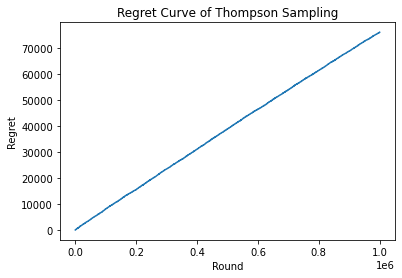

In [10]:
plt.plot(regret)
plt.title('Regret Curve of Thompson Sampling')
plt.xlabel('Round')
plt.ylabel('Regret')
plt.show()

**- Regret of the Random Strategy:**

In [11]:
strategies_selected_rs = []
total_reward_rs = 0
total_reward_bs = 0
numbers_of_rewards_1 = [0] * s
numbers_of_rewards_0 = [0] * s
rewards_strategies = [0] * s
regret = []
for n in range(0, C):
    # Random Strategy
    strategy_rs = random.randrange(s)
    strategies_selected_rs.append(strategy_rs)
    reward_rs = X[n, strategy_rs]
    total_reward_rs = total_reward_rs + reward_rs
    # Best Strategy
    for i in range(0, s):
        rewards_strategies[i] = rewards_strategies[i] + X[n, i]
    total_reward_bs = max(rewards_strategies)
    # Regret
    regret.append(total_reward_bs - total_reward_rs)

**- Plotting the Regret Curve of Random Strategy:**

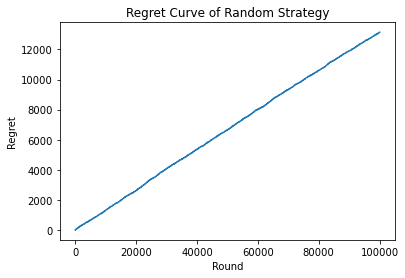

In [12]:
plt.plot(regret)
plt.title('Regret Curve of Random Strategy')
plt.xlabel('Round')
plt.ylabel('Regret')
plt.show()